In [1]:
import pyclesperanto_prototype as cle
import beetlesafari as bs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cle.select_device('RTX')

C:\Users\rober\miniconda3\envs\bio3\lib\site-packages\magicgui\widgets\_bases\ranged_widget.py:28: FutureWarning: The 'maximum' keyword arguments has been changed to 'max'. In the future this will raise an exception

  warn(
C:\Users\rober\miniconda3\envs\bio3\lib\site-packages\magicgui\widgets\_bases\ranged_widget.py:28: FutureWarning: The 'minimum' keyword arguments has been changed to 'min'. In the future this will raise an exception

  warn(


<GeForce RTX 2080 Ti on Platform: NVIDIA CUDA (1 refs)>

Load a [ClearControl](https://github.com/ClearControl) dataset.

In [2]:
cc_dataset = bs.ClearControlDataset('C:/structure/data/2019-12-17-16-54-37-81-Lund_Tribolium_nGFP_TMR/')

print("Duration in seconds:", cc_dataset.get_duration_in_seconds())

print("Duration in hours:", bs.seconds_to_hours(cc_dataset.get_duration_in_seconds()))

Duration in seconds: 607654.0077
Duration in hours: 168.79277991666666


Visualization of time points (maximum projections)

Text(0.5, 0.98, '14 hours of Tribolium embryo development')

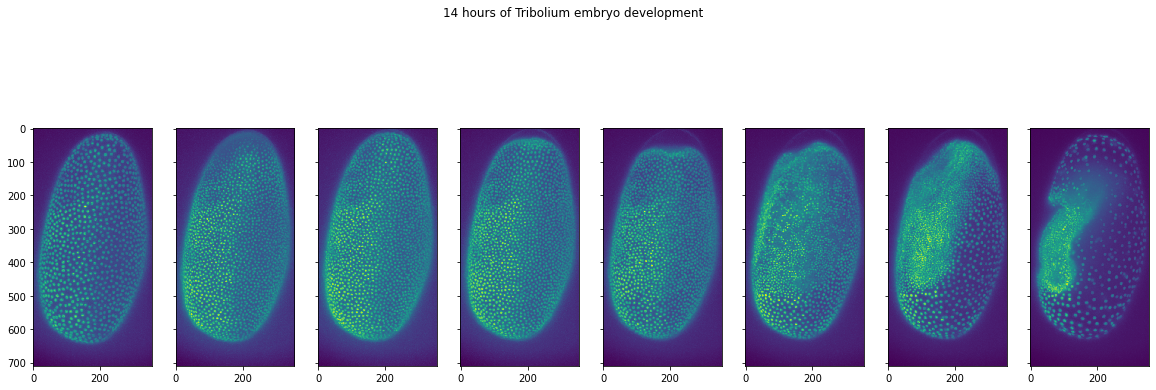

In [9]:
fig, axs = plt.subplots(1, 8, figsize=(20, 7), sharey=True)

data = []

# visualize the dataset at the beginning of every day
for i, d in enumerate(range(6, 22, 2)):
    image = cc_dataset.get_resampled_image(time_in_seconds=bs.hours_to_seconds(d), linear_interpolation=False)
    data.append(image)
    cle.imshow(image, plot=axs[i])

fig.suptitle('14 hours of Tribolium embryo development')

Segmentation

Segmentation took 0.3468818664550781 s


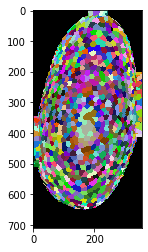

In [10]:
cells, spots = bs.segmentation(data[0])
cle.imshow(cells, labels=True)

Centroid extraction

In [11]:
centroids = cle.centroids_of_labels(cells)
print(centroids.shape)
print(np.asarray(centroids).T)

(3, 1086)
[[ 17.751396  477.54572     3.3992984]
 [283.9319     66.560555    5.328371 ]
 [ 21.460575  506.25015     3.8617942]
 ...
 [185.16199   382.8608    153.66054  ]
 [170.56447   395.43542   153.75455  ]
 [175.24144   417.35052   153.08353  ]]


In [12]:
df = pd.DataFrame(np.asarray(centroids).T, columns=["X", "Y", "Z"])
df

,X,Y,Z
0,17.751396,477.545715,3.399298
1,283.931885,66.560555,5.328371
2,21.460575,506.250153,3.861794
3,153.863235,636.409363,3.852566
4,335.690063,385.318085,4.589118
...,...,...,...
1081,181.896042,368.188477,153.825760
1082,166.165619,380.224304,153.450821
1083,185.161987,382.860809,153.660538
1084,170.564468,395.435425,153.754547


Save centroids to csv_files - for each frame

Segmentation took 0.44953298568725586 s


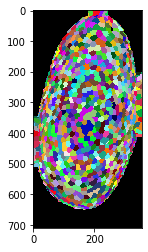

(3, 1086)
Segmentation took 0.3843045234680176 s


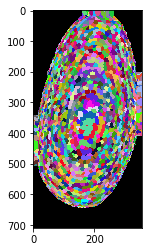

(3, 2117)
Segmentation took 0.3465104103088379 s


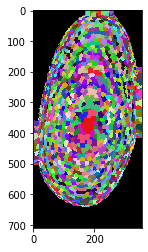

(3, 2067)
Segmentation took 0.3496663570404053 s


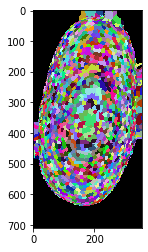

(3, 2078)
Segmentation took 0.35413599014282227 s


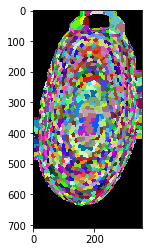

(3, 2033)
Segmentation took 0.36533021926879883 s


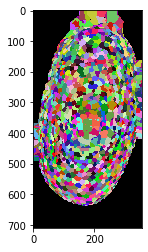

(3, 2116)
Segmentation took 0.36693382263183594 s


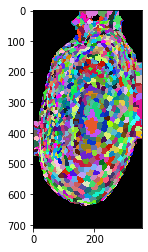

(3, 2234)
Segmentation took 0.3690321445465088 s


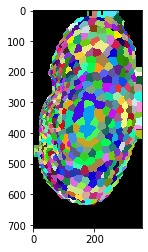

(3, 1508)


In [15]:
for i, d in enumerate(data):
    cells, spots = bs.segmentation(d)
    cle.imshow(cells, labels=True)
    centroids = cle.centroids_of_labels(cells)
    print(centroids.shape)
    df = pd.DataFrame(np.asarray(centroids).T, columns=["X", "Y", "Z"])
    df.to_csv("data/centroids_{}.csv".format(i))

Load data and visualize

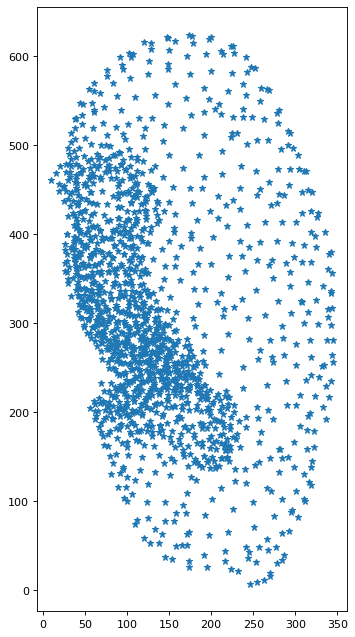

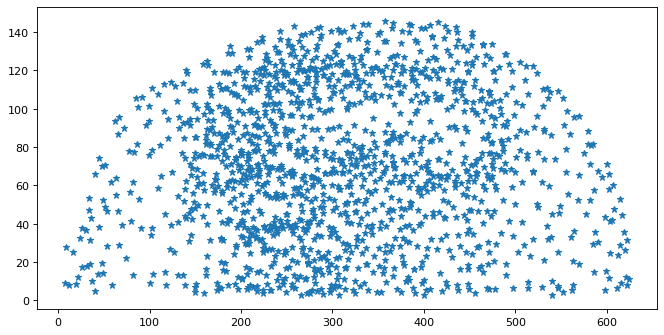

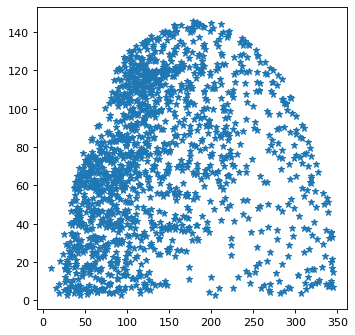

In [14]:
df=pd.read_csv('centroids_7.csv')

plt.figure(figsize=(5, 10), dpi=80)
plt.plot(df['X'], df['Y'], '*')

plt.figure(figsize=(10, 5), dpi=80)
plt.plot(df['Y'], df['Z'], '*')

plt.figure(figsize=(5, 5), dpi=80)
plt.plot(df['X'], df['Z'], '*')
